[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=lab/tree/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Kreidenweis_et_al_2003/demo.ipynb)

#### based on Jaruga and Pawlowska (Geosci. Model Dev. 11)  "_libcloudph++ 2.0: aqueous-phase chemistry extension of the particle-based cloud microphysics scheme_"   
https://doi.org/10.5194/gmd-11-3623-2018

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install git+https://github.com/atmos-cloud-sim-uj/PySDM-examples.git
    !ldconfig

In [7]:
from PySDM_examples.Kreidenweis_et_al_2003 import Settings, Simulation
from PySDM.physics import si
from PySDM_examples.utils.show_plot import show_plot
from PySDM.products import AqueousMassSpectrum
from matplotlib import pyplot
import os

In [8]:
settings = Settings(dt=1*si.s, n_sd=16 if 'CI' in os.environ else 256, n_substep=5)
products = (
    AqueousMassSpectrum("S_VI", settings.dry_radius_bins_edges, specific=True),
    AqueousMassSpectrum("S_VI", settings.dry_radius_bins_edges, specific=False),
)
simulation = Simulation(settings, products)
output = simulation.run()

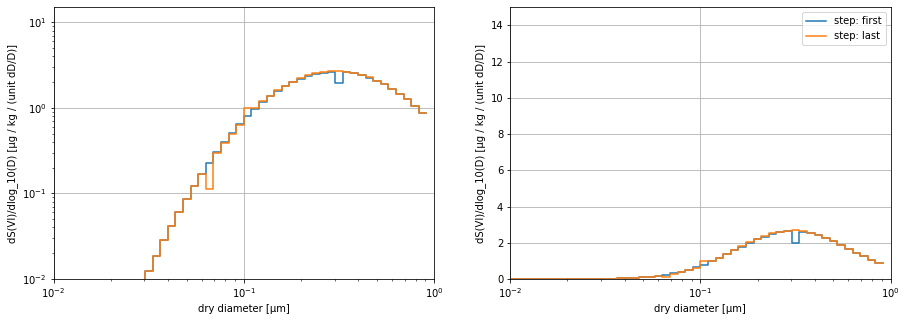

HTML(value="<a href='./tmp5ilh06y2.pdf' target='_blank'>./tmp5ilh06y2.pdf</a><br>")

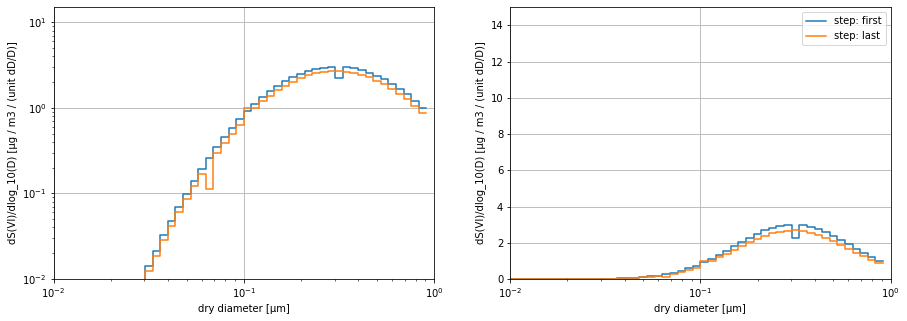

HTML(value="<a href='./tmp9doq8r0s.pdf' target='_blank'>./tmp9doq8r0s.pdf</a><br>")

In [9]:
for product in products:
    fig, axs = pyplot.subplots(1, 2, figsize=(15,5))
    labels = {0:"first", -1:"last"}
    for ax in axs:
        for step in labels.keys():
            ax.step(
                2e6 * settings.dry_radius_bins_edges[:-1],
                output[product.name][step],
                label=f'step: {labels[step]}'
            )
        ax.set_ylabel(f'dS(VI)/dlog_10(D) [{product.unit}]')
        ax.set_xlabel('dry diameter [µm]')
        ax.set_xlim([.01, 1])
        ax.grid()
        ax.set_xscale('log')

    axs[0].set_yscale('log')
    axs[0].set_ylim([.01, 15])
    axs[1].set_ylim([0, 15])
    axs[1].legend()

    show_plot()